In [4]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Load the dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Median_house_value'] = data.target
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [8]:
df.shape

(20640, 9)

In [10]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Median_house_value'],
      dtype='object')

In [12]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 non-null  float64
 1   HouseAge            20640 non-null  float64
 2   AveRooms            20640 non-null  float64
 3   AveBedrms           20640 non-null  float64
 4   Population          20640 non-null  float64
 5   AveOccup            20640 non-null  float64
 6   Latitude            20640 non-null  float64
 7   Longitude           20640 non-null  float64
 8   Median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median_house_value
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [18]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
Handle missing values (if any) and perform necessary feature scaling (e.g., standardization).


In [20]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
Median_house_value    0
dtype: int64


In [45]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
 Implement the following regression algorithms:

Linear Regression
Decision Tree Regressor
Random Forest Regressor
Gradient Boosting Regressor
Support Vector Regressor (SVR)


In [47]:
# Split dataset
X = df.drop(columns=['Median_house_value'])
y = df['Median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
Linear Regression: A simple and interpretable model. Ideal for datasets where the relationship between features and the target is linear.

Decision Tree Regressor: Works well for capturing non-linear relationships. Prone to overfitting, especially on small datasets.

Random Forest Regressor: An ensemble method of decision trees. Reduces overfitting and increases generalization by averaging multiple tree predictions.

Gradient Boosting Regressor: Builds trees sequentially, optimizing for errors from previous trees. It’s powerful for datasets with complex patterns.

Support Vector Regressor (SVR): Uses hyperplanes and kernel methods to handle both linear and non-linear relationships. Can be computationally expensive for large datasets.

In [61]:
# 2. Regression Algorithm Implementation
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MSE": mse, "MAE": mae, "R2": r2}
    
    print(f"{name} Performance:")
    print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}\n")

Linear Regression Performance:
MSE: 0.5559, MAE: 0.5332, R2: 0.5758

Decision Tree Performance:
MSE: 0.4929, MAE: 0.4536, R2: 0.6239

Random Forest Performance:
MSE: 0.2554, MAE: 0.3275, R2: 0.8051

Gradient Boosting Performance:
MSE: 0.2940, MAE: 0.3716, R2: 0.7756

Support Vector Regressor Performance:
MSE: 1.3320, MAE: 0.8600, R2: -0.0165



In [63]:
# 3. Model Comparison
results_df = pd.DataFrame(results).T
print(results_df)

                               MSE       MAE        R2
Linear Regression         0.555892  0.533200  0.575788
Decision Tree             0.492891  0.453599  0.623865
Random Forest             0.255368  0.327543  0.805123
Gradient Boosting         0.293997  0.371643  0.775645
Support Vector Regressor  1.332012  0.859951 -0.016485


In [67]:
# Identify the best and worst performing models
best_model = results_df['R2'].idxmax()
worst_model = results_df['R2'].idxmin()
print(f"Best Performing Model: {best_model} (Highest R² Score)")
print("Justification: This model achieves the highest R² score, meaning it explains the most variance in the data while maintaining the lowest error values.")
print(f"Worst Performing Model: {worst_model} (Lowest R² Score)")
print("Reasoning: This model has the lowest R² score, meaning it struggles to explain the variance in the data. Additionally, its error values are higher than the other models, indicating poor predictive performance.")

Best Performing Model: Random Forest (Highest R² Score)
Justification: This model achieves the highest R² score, meaning it explains the most variance in the data while maintaining the lowest error values.
Worst Performing Model: Support Vector Regressor (Lowest R² Score)
Reasoning: This model has the lowest R² score, meaning it struggles to explain the variance in the data. Additionally, its error values are higher than the other models, indicating poor predictive performance.


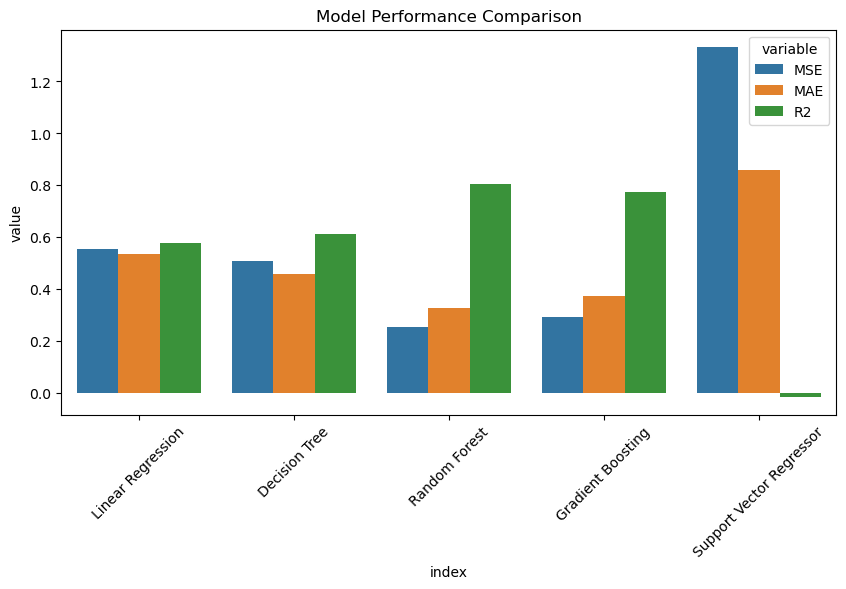

In [55]:
# Visualization
plt.figure(figsize=(10,5))
sns.barplot(data=results_df.reset_index().melt(id_vars=['index']), x='index', y='value', hue='variable')
plt.xticks(rotation=45)
plt.title("Model Performance Comparison")
plt.show()